# HR Analytics Project- Understanding the Attrition in HR <br>
### <u>Problem Statement</u>:
<font size = 2>
    <div style="text-align:justify">
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees? <br>

1. HR Analytics

    
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

2. Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

3. Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.
        </div>

In [232]:
# 1. Import the libraries
# basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# statistical libraries
import phik
from scipy.stats import pearsonr
from scipy.stats import zscore

# feature engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# metrics 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, classification_report, accuracy_score
from sklearn.metrics import plot_roc_curve
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [179]:
df = pd.read_csv('HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There aren't null values present in the dataset

In [6]:
# Check dataset statistics
df.describe().round()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,...,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0
mean,37.0,802.0,9.0,3.0,1.0,1025.0,3.0,66.0,3.0,2.0,...,3.0,80.0,1.0,11.0,3.0,3.0,7.0,4.0,2.0,4.0
std,9.0,404.0,8.0,1.0,0.0,602.0,1.0,20.0,1.0,1.0,...,1.0,0.0,1.0,8.0,1.0,1.0,6.0,4.0,3.0,4.0
min,18.0,102.0,1.0,1.0,1.0,1.0,1.0,30.0,1.0,1.0,...,1.0,80.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,30.0,465.0,2.0,2.0,1.0,491.0,2.0,48.0,2.0,1.0,...,2.0,80.0,0.0,6.0,2.0,2.0,3.0,2.0,0.0,2.0
50%,36.0,802.0,7.0,3.0,1.0,1020.0,3.0,66.0,3.0,2.0,...,3.0,80.0,1.0,10.0,3.0,3.0,5.0,3.0,1.0,3.0
75%,43.0,1157.0,14.0,4.0,1.0,1556.0,4.0,84.0,3.0,3.0,...,4.0,80.0,1.0,15.0,3.0,3.0,9.0,7.0,3.0,7.0
max,60.0,1499.0,29.0,5.0,1.0,2068.0,4.0,100.0,4.0,5.0,...,4.0,80.0,3.0,40.0,6.0,4.0,40.0,18.0,15.0,17.0


The statistics for the numeric datatypes looks sound, we can proceed by plotting the histogram to look at the distribution and look for either skewness,outliers or capping of values

In [7]:
from pandas.api.types  import is_numeric_dtype

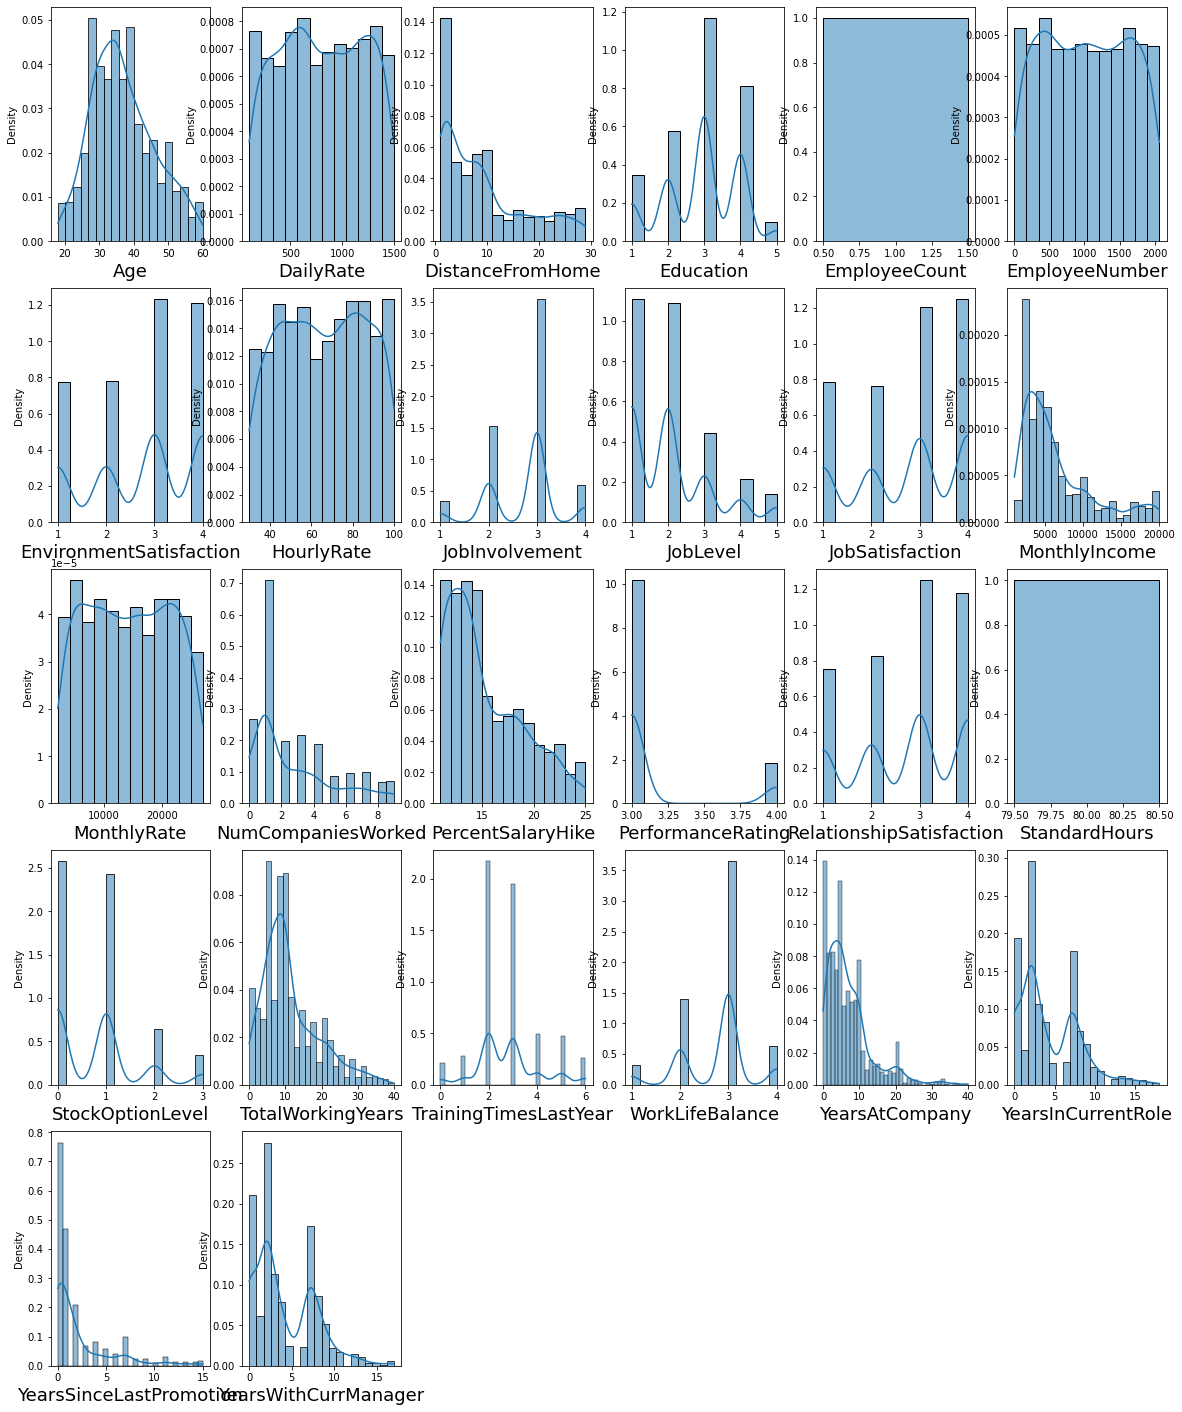

In [8]:
plt.figure(figsize = (20,25))
plotnumber = 1
for col in df.columns:
    if is_numeric_dtype(df[col]):
        if plotnumber < 30:
            plt.subplot(5,6, plotnumber)
            sns.histplot(df[col], kde = True, stat = 'density')
            plt.xlabel(col, fontsize = 18)
        plotnumber += 1
plt.show()
                

From the histogram above the following columns are categorical with numerical datatypes
   * Education
   * EnvironmentSatisfaction
   * JobInvolvement
   * JobLevel
   * JobSatisfaction
   * Performance Rating
   * RelationshipSatisfaction
   * StockOptionLevel
   * TrainTimesLastYear
   * WorkLifeBalance

In [9]:
numeric_categorical_features = ['Education',
'EnvironmentSatisfaction',
'JobInvolvement',
'JobLevel',
'JobSatisfaction',
'PerformanceRating',
'RelationshipSatisfaction',
'StockOptionLevel',
'TrainingTimesLastYear',
'WorkLifeBalance']

In [180]:
y = df['Attrition']
df.drop('Attrition', axis = 1, inplace = True)

In [11]:
# Variance Threshold 
# Testing to see if there is a very high variance or extremely low variance in the dataset
features_to_be_dropped = []

# Collecting features which have a very high variance
for col in df.columns:
    if df.loc[:,col].unique().shape[0]/len(df) * 100 > 80:
        features_to_be_dropped.append(col)
    if df.loc[:,col].unique().shape[0] == 1:
        features_to_be_dropped.append(col)

In [12]:
for col in features_to_be_dropped:
    print(col, '       ', df[col].unique().shape[0])

EmployeeCount         1
EmployeeNumber         1470
MonthlyIncome         1349
MonthlyRate         1427
Over18         1
StandardHours         1


* Features EmployeeCount,Over18 and StandardHours have only one unique value and hence they don't contribute to the model prediction.<br>
* EmployeeNumber on the other hand has a high variance with all values distinct <br>
* The features MonthlyIncome and MonthlyRate though have a high variance, we will investigate it further wrt to their correlation with the target variable

In [13]:
features_to_be_dropped.remove('MonthlyIncome')

In [14]:
features_to_be_dropped.remove('MonthlyRate')

In [15]:
df.drop(columns = features_to_be_dropped, inplace = True)

In [16]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,3,4,1,6,3,3,2,2,2,2


In [17]:
df2 = df.copy()

In [18]:
df2[numeric_categorical_features] = df2[numeric_categorical_features].astype('category')

In [19]:
import phik

In [20]:
temp = pd.DataFrame()
score= []
pvalue=[]
feature=[]

In [21]:
for col in df.columns:
    if is_numeric_dtype(df[col]):
        score.append(phik.phik_from_array(df[col], y, [col]))
        pvalue.append(phik.significance.significance_from_array(df[col],y,[col])[0])
        feature.append(col)
    else:
        score.append(phik.phik_from_array(df[col], y))
        pvalue.append(phik.significance.significance_from_array(df[col],y)[0])
        feature.append(col)

In [22]:
temp['feature'] = feature
temp['score'] = score
temp['pvalue'] = pvalue

In [23]:
temp.set_index('feature', inplace = True)

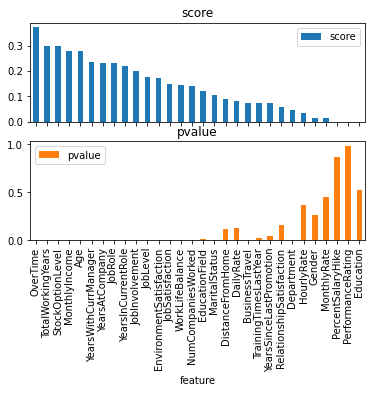

In [24]:
temp.sort_values('score', ascending = False).plot.bar(subplots = True)
plt.show()

The above plot of the correlation and significance shows the HourlyRate, Gender, MonthlyRate, PercentSalaryHike, PerformanceRating and Education have extremely low correlations with the target variable and also a significance greater than 0.05. 

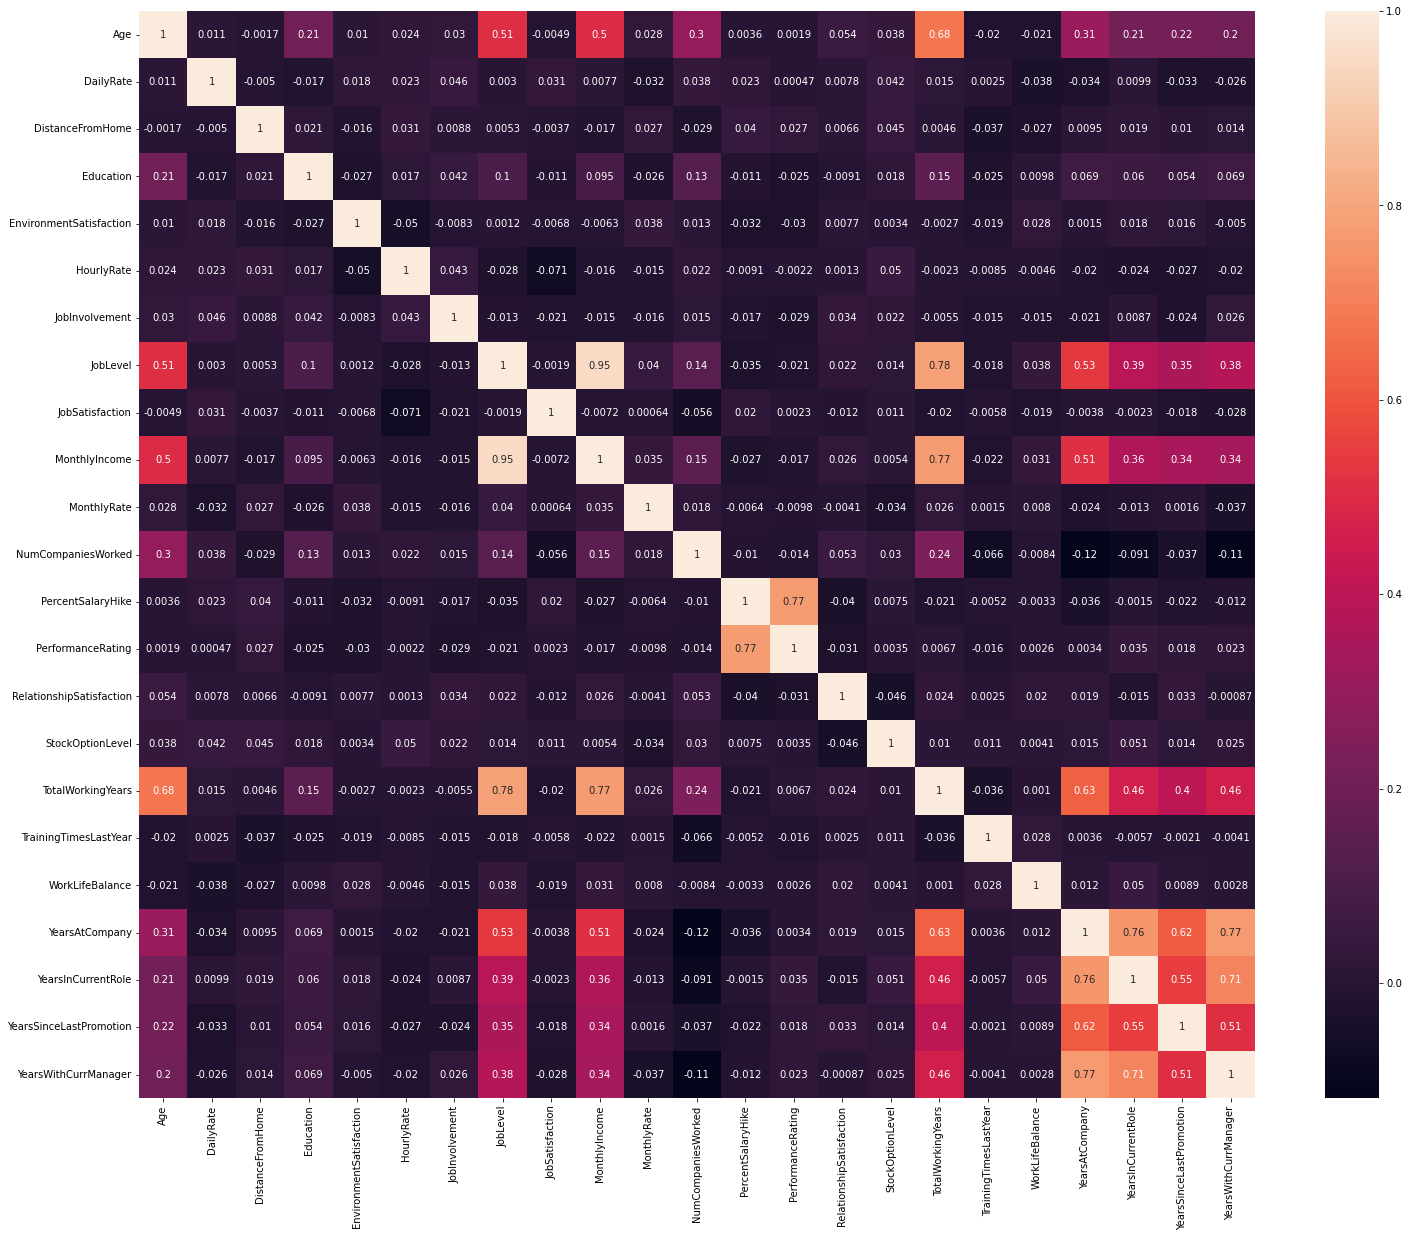

In [25]:
# Checking for Multicolinearity with heatmap

plt.figure(figsize = (25, 20))
sns.heatmap(df.corr(), annot = True)
plt.show()

Observations :  
   1. The MonthlyRate poorly correlates with any other feature and also with the target variable
   2. The MonthlyIncome and the jobLevel correlate strongly with each other. The MonthlyIncome correlates much more strongly with the target value. However, the MonthlyIncome adds a lot of variablility which would make it difficult to get confident estimates.

In [26]:
# we further investigate the correlation among features using the variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [27]:
df3 = df._get_numeric_data()

In [28]:
temp = pd.DataFrame()
temp['features'] = df3.columns
temp['score'] = [vif(df3,i) for i in range(df3.shape[1])]


In [29]:
temp.sort_values('score',ascending = False)

,features,score
13,PerformanceRating,114.724181
7,JobLevel,49.657767
12,PercentSalaryHike,41.829000
0,Age,33.155944
9,MonthlyIncome,31.318636
18,WorkLifeBalance,15.310855
6,JobInvolvement,14.885028
16,TotalWorkingYears,14.336803
5,HourlyRate,11.107000
19,YearsAtCompany,10.559993


PerformanceRating if found to have a high vif score, also from the heatmap it is found to have a high correlation with the PercentSalaryHike

Hence we drop the following columns either because their correlation with the target value is insignificant or they have a high correlation with another column
   * MonthlyRate
   * MonthlyIncome
   * PerformanceRating
   
Logical Reasoning : 
* The MonthlyRate is nearly unique for each candidate, 97% of the candidates have a unique MonthlyRate, such variance would not add much to the generalization of the 
* The MonthlyIncome though has a high correlation with the target value, it also correlates strongly with the JobLevel, which would make sense, since the higher the level the higher the earning. However, 91% of the MonthlyIncome is unique in the dataset and hence we using the JobLevel would be more convenient
* PerformanceRating has an extremely high vif score, also the rating would be a lesser of a reason for the person already disengaged from the company

In [30]:
x = df.drop(columns = ['MonthlyRate','MonthlyIncome','PerformanceRating'], axis = 1)

In [31]:
numeric_categorical_features.remove('PerformanceRating')

In [32]:
x[numeric_categorical_features]

,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance
0,2,2,3,2,4,1,0,0,1
1,1,3,2,2,2,4,1,3,3
2,2,4,2,1,3,2,0,3,3
3,4,4,3,1,3,3,0,3,3
4,1,1,3,1,2,4,1,3,3
...,...,...,...,...,...,...,...,...,...
1465,2,3,4,2,4,3,1,3,3
1466,1,4,2,3,1,1,1,5,3
1467,3,2,4,2,2,2,1,0,3
1468,3,4,2,2,2,4,0,3,2


In [33]:
numeric_categorical_features

['Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

In [34]:
numeric_continuous_features = [col for col in x.columns if(is_numeric_dtype(x[col]) and col not in numeric_categorical_features)]

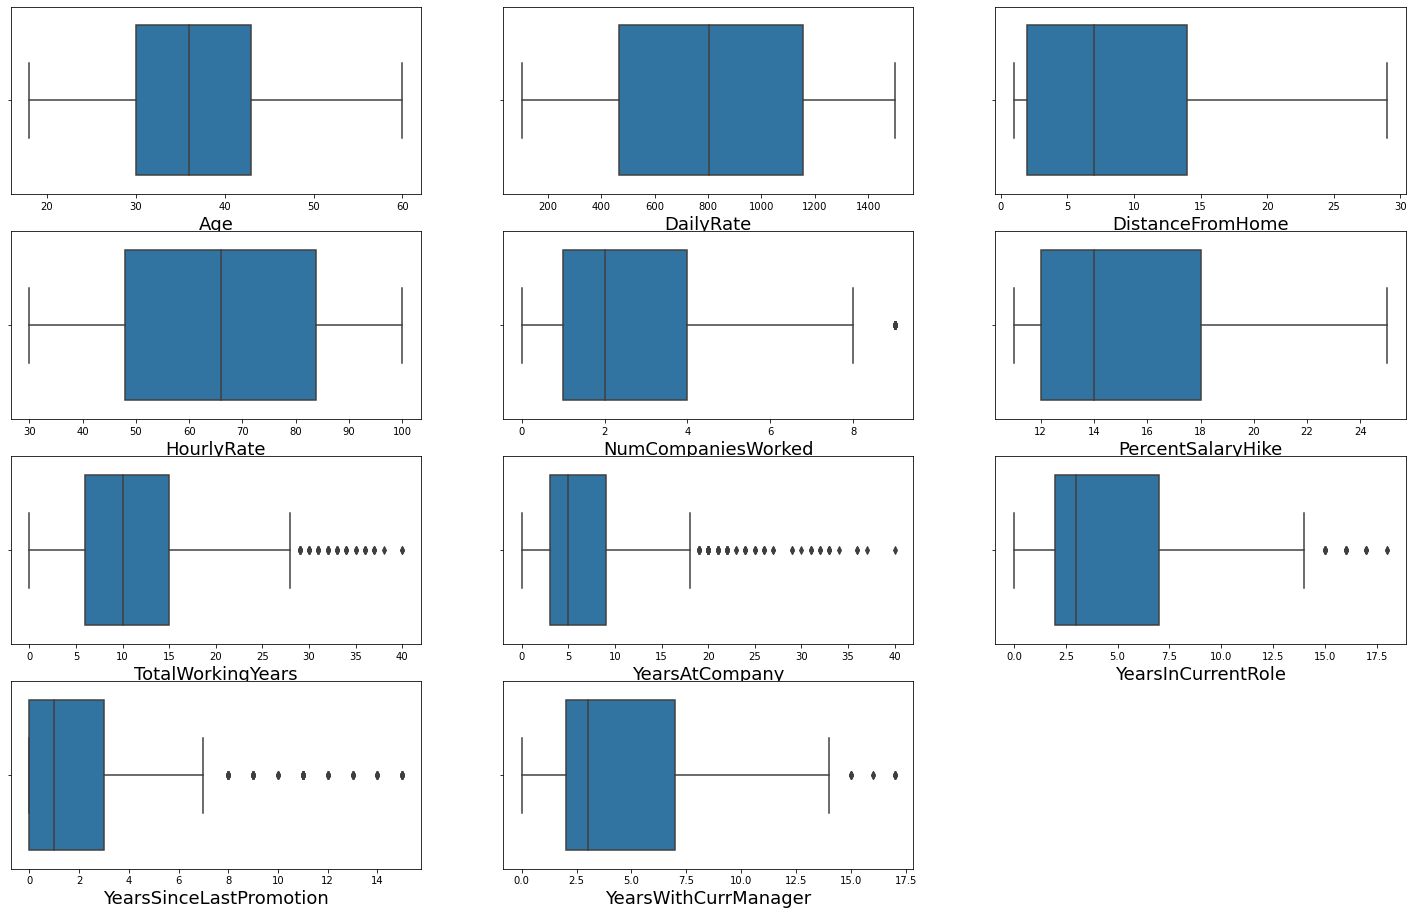

In [35]:
plt.figure(figsize = (25, 20))
plotnumber = 1
for col in numeric_continuous_features:
    if plotnumber < 15:
        plt.subplot(5,3,plotnumber)
        sns.boxplot(x[col], orient ='h')
        plt.xlabel(col, fontsize = 18)
    plotnumber += 1
plt.show()

In [36]:
outlier_features = ['TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [37]:
for col in outlier_features:
    hi = x[col].quantile(0.75)
    lo = x[col].quantile(0.25)
    iqr= hi-lo
    upper_bound = hi + 1.5 * iqr
    indices = np.where(x[col] > upper_bound)
    test = x.drop(index = indices[0])
    print(col)
    print(f'Before dropping outliers : {x.shape[0]}')
    print(f'After dropping outliers  : {test.shape[0]}')
    print(f'% data lost {(x.shape[0] - test.shape[0]) * 100/x.shape[0]  : 0.2f}')

TotalWorkingYears
Before dropping outliers : 1470
After dropping outliers  : 1407
% data lost  4.29
YearsAtCompany
Before dropping outliers : 1470
After dropping outliers  : 1366
% data lost  7.07
YearsInCurrentRole
Before dropping outliers : 1470
After dropping outliers  : 1449
% data lost  1.43
YearsSinceLastPromotion
Before dropping outliers : 1470
After dropping outliers  : 1363
% data lost  7.28
YearsWithCurrManager
Before dropping outliers : 1470
After dropping outliers  : 1456
% data lost  0.95


removing the outliers from 'YearsInCurrentRole' and 'YearsWithCurrManager' results in close to 2.5% data being lost which is acceptable. Hence we drop those indices from the dataset

In [38]:
# Actually dropping the rows that have the outliers
iqr =  x[outlier_features].quantile(0.75) -  x[outlier_features].quantile(0.25)
for col in outlier_features:
    indices = np.where(x[col] > x[col].quantile(0.75) + iqr[col])
    x.drop(x.index[indices], inplace = True)

In [39]:
print(f'{x.shape[0]/df.shape[0]*100 : 0.3f}% of the data is still retained')

 75.102% of the data is still retained


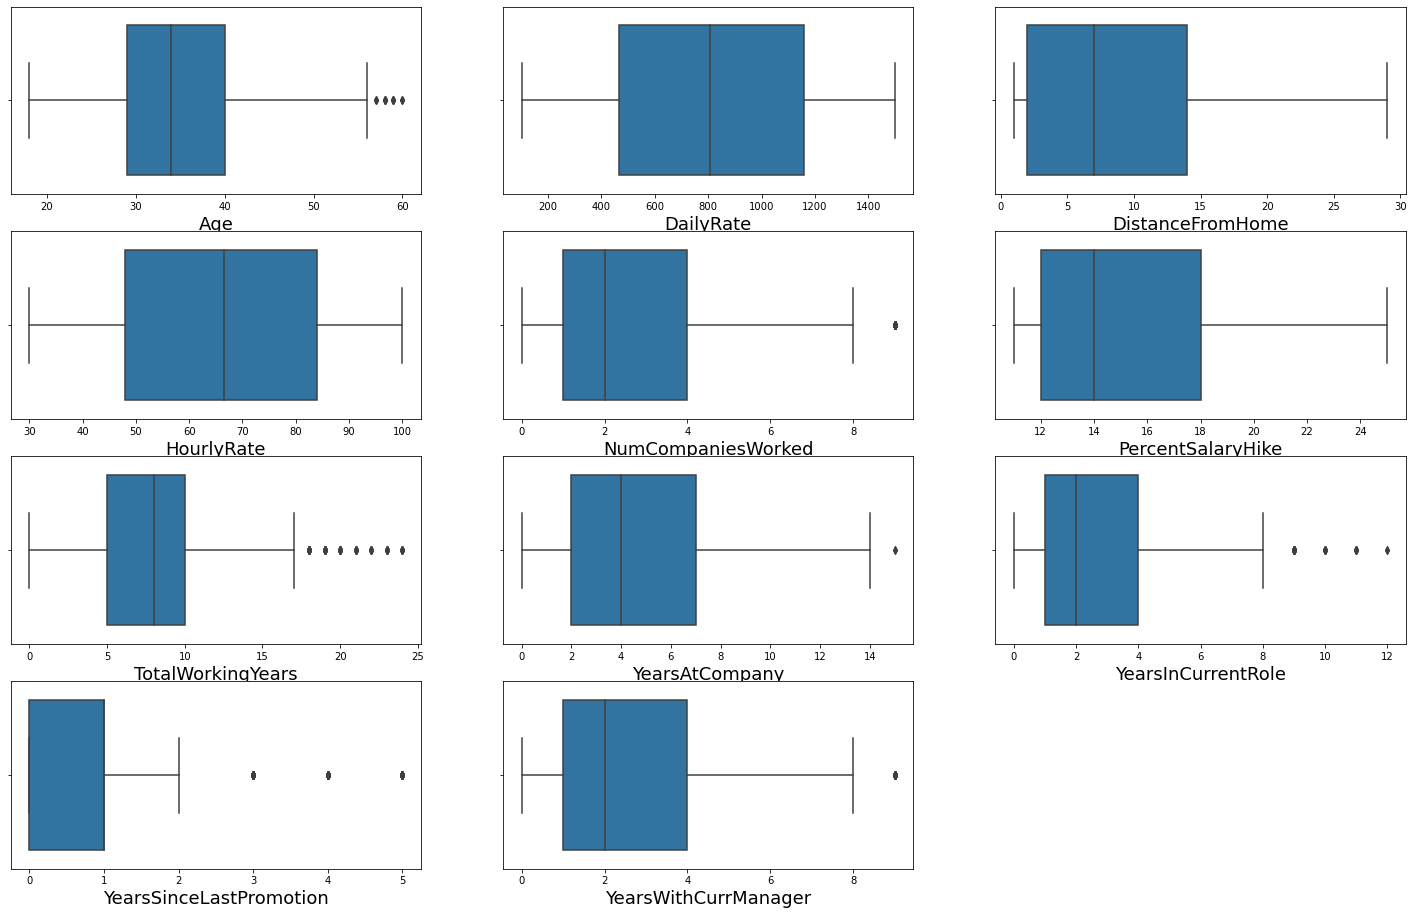

In [40]:
# looking at the boxplots again
plt.figure(figsize = (25, 20))
plotnumber = 1
for col in numeric_continuous_features:
    if plotnumber < 15:
        plt.subplot(5,3,plotnumber)
        sns.boxplot(x[col], orient ='h')
        plt.xlabel(col, fontsize = 18)
    plotnumber += 1
plt.show()

In [45]:
from scipy.stats import zscore

In [48]:
z = abs(zscore(x[outlier_features]))

In [51]:
x.loc[]

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,11,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,23,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,15,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,11,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,12,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,...,17,3,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,...,15,1,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,...,20,2,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,...,14,4,0,17,3,2,9,6,0,8


In [52]:
x_new = df.drop(columns = ['MonthlyRate','MonthlyIncome','PerformanceRating'], axis = 1)

In [54]:
z = np.abs(zscore(x_new[outlier_features]))

In [55]:
filtered_values = (z < 3).all(axis = 1)

In [58]:
x_new = x_new[filtered_values]

In [62]:
x_new.shape[0]/len(df)

0.9435374149659864

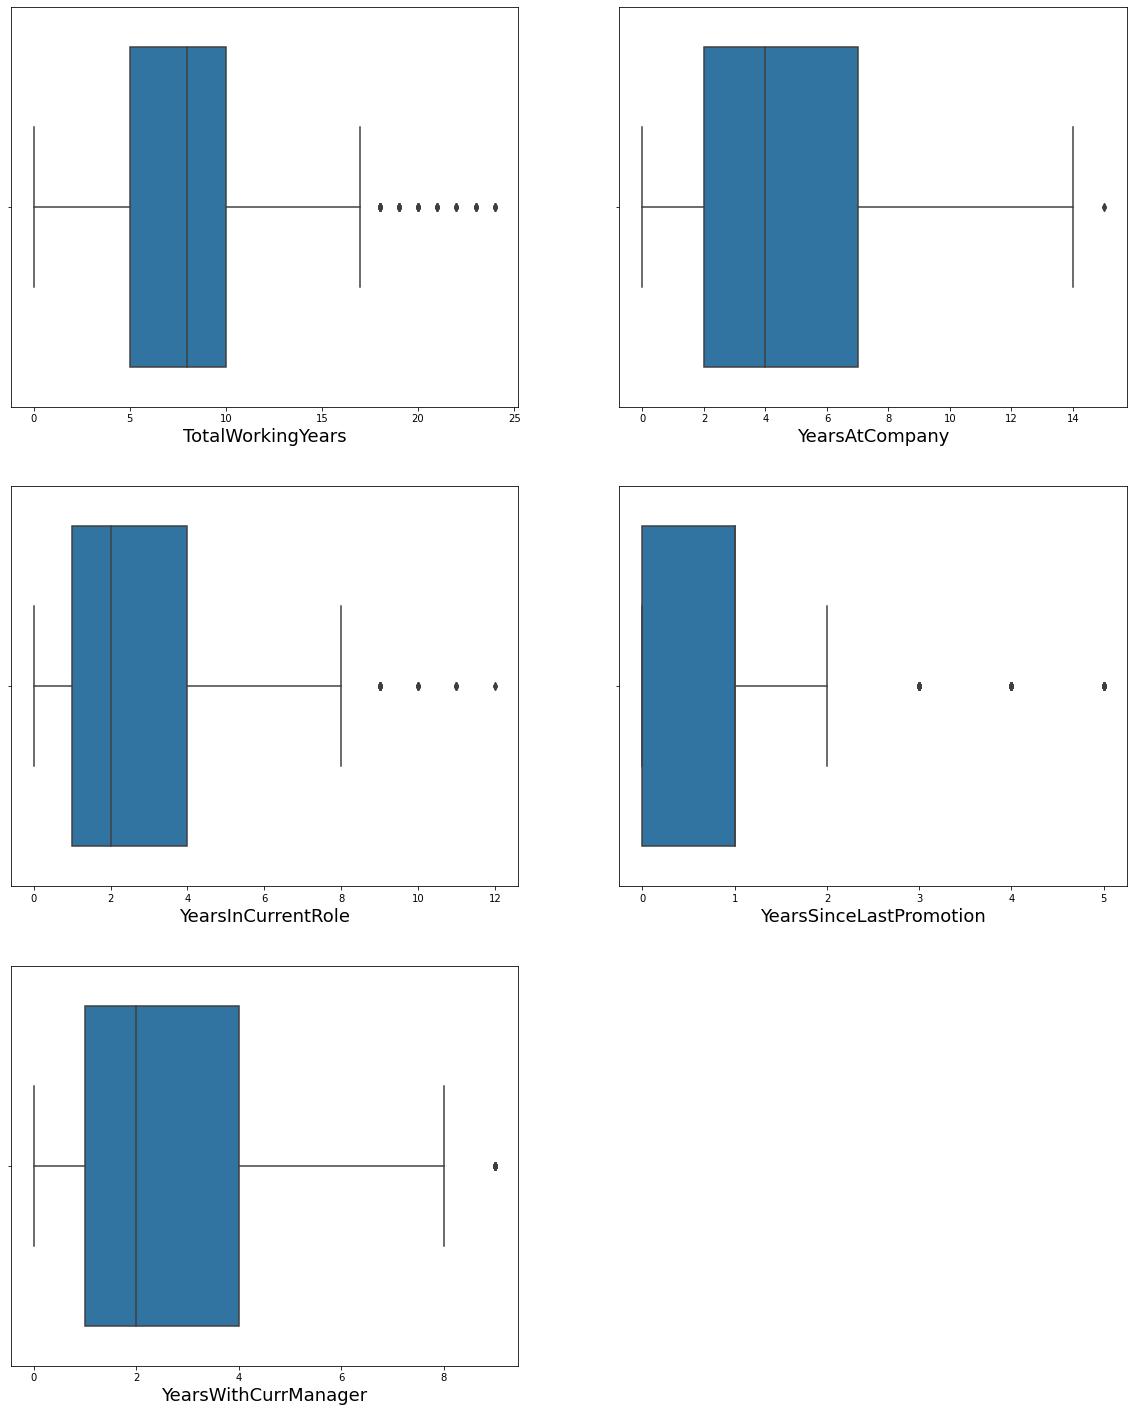

In [64]:
plt.figure(figsize = (20,25))
plotnumber = 1

for col in outlier_features:
    plt.subplot(3,2, plotnumber)
    sns.boxplot(x[col], orient = 'h')
    plt.xlabel(col, fontsize = 18)
    plotnumber += 1
plt.show()

<font color = red>
Using the interquantile range to trim the outliers out results in losing 25% of the dataset, where as using the score we lose only 6% of the data and hence we will use the zscore to remove the outliers. 
</font>

In [65]:
x = x_new

In [70]:
x[numeric_categorical_features]

,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance
0,2,2,3,2,4,1,0,0,1
1,1,3,2,2,2,4,1,3,3
2,2,4,2,1,3,2,0,3,3
3,4,4,3,1,3,3,0,3,3
4,1,1,3,1,2,4,1,3,3
...,...,...,...,...,...,...,...,...,...
1465,2,3,4,2,4,3,1,3,3
1466,1,4,2,3,1,1,1,5,3
1467,3,2,4,2,2,2,1,0,3
1468,3,4,2,2,2,4,0,3,2


In [76]:
categorical_features = [col for col in x.columns if not is_numeric_dtype(x[col])]

In [87]:
x[categorical_features].head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [102]:
# Finally we encode our data
binary_encoded_data = pd.get_dummies(x.loc[:,['Gender','OverTime']], drop_first = True)

In [103]:
x['Gender'] = binary_encoded_data['Gender_Male']

In [104]:
x['OverTime'] = binary_encoded_data['OverTime_Yes']

In [106]:
x[categorical_features]

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,0,Sales Executive,Single,1
1,Travel_Frequently,Research & Development,Life Sciences,1,Research Scientist,Married,0
2,Travel_Rarely,Research & Development,Other,1,Laboratory Technician,Single,1
3,Travel_Frequently,Research & Development,Life Sciences,0,Research Scientist,Married,1
4,Travel_Rarely,Research & Development,Medical,1,Laboratory Technician,Married,0
...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,1,Laboratory Technician,Married,0
1466,Travel_Rarely,Research & Development,Medical,1,Healthcare Representative,Married,0
1467,Travel_Rarely,Research & Development,Life Sciences,1,Manufacturing Director,Married,1
1468,Travel_Frequently,Sales,Medical,1,Sales Executive,Married,0


In [117]:
x = pd.concat([x, pd.get_dummies(x['MaritalStatus'],drop_first = True)], axis =1)

In [118]:
x.drop('MaritalStatus', axis=1, inplace = True)

In [122]:
x = pd.concat([x,pd.get_dummies(x['BusinessTravel'], drop_first = True)], axis = 1)

In [123]:
x.drop('BusinessTravel', axis = 1, inplace = True)

In [125]:
x = pd.concat([x,pd.get_dummies(x['Department'])], axis = 1)

In [126]:
x.drop('Department', axis = 1, inplace = True)

In [131]:
x = pd.concat([x,pd.get_dummies(x['EducationField'])], axis = 1)

In [132]:
x.drop('EducationField', axis = 1, inplace = True)

The JobLevel is an label categorical data and hence we use the LabelEncoder

In [136]:
from sklearn.preprocessing import LabelEncoder

In [138]:
le = LabelEncoder()

In [140]:
job_level_encoded = le.fit_transform(x[['JobRole']])

In [143]:
x['JobRole'] = job_level_encoded

In [187]:
y = y[x.index]

In [188]:
y = pd.get_dummies(y, drop_first = True)

In [189]:
y.shape

(1387, 1)

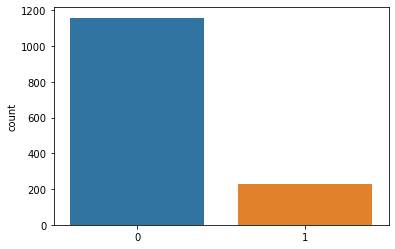

In [257]:
sns.countplot(y.values[:,0])
plt.show()

<font color = red>
Since the target class shows a severe class imbalance, we over sample the minority class since the dataset is not large enough
</font>

In [263]:
from imblearn.over_sampling import RandomOverSampler

In [264]:
x_resampled, y_resampled = RandomOverSampler().fit_resample(x,y)

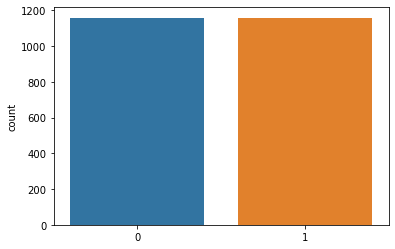

In [266]:
sns.countplot(y_resampled.values[:,0])
plt.show()

# Model Training

In [267]:
xtrain, xtest, ytrain, ytest = train_test_split(x_resampled,y_resampled,test_size = 0.25, random_state = 42)

In [268]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
kn = KNeighborsClassifier()
rf = RandomForestClassifier()

In [269]:
estimators = []
estimators.append(('logistic regression', lr))
estimators.append(('decisionTreeClassifier', dt))
estimators.append(('K Neighbors Classifier', kn))
estimators.append(('Random Forest Classifier', rf))

In [270]:
for estimator in estimators:
    estimator[1].fit(xtrain, ytrain)
    ypred = estimator[1].predict(xtrain)
    print(estimator[0])
    print(f'{accuracy_score(ytrain,ypred)*100:0.3f}')

logistic regression
72.884
decisionTreeClassifier
100.000
K Neighbors Classifier
83.823
Random Forest Classifier
100.000


In [271]:
for estimator in estimators:
    estimator[1].fit(xtrain, ytrain)
    ypred = estimator[1].predict(xtest)
    print(estimator[0])
    print(f'{accuracy_score(ytest,ypred)*100:0.3f}')

logistic regression
71.157
decisionTreeClassifier
92.401
K Neighbors Classifier
76.166
Random Forest Classifier
97.237


From the above the Decision tree obviously overpredicts as it a deterministic classifier, however with the help of hyperparameter tuning the we will attempt to make the make the more accurate. 

In [272]:
param_grid = {'criterion':['gini','entropy'],
                 'max_depth':[2,3,4,5,6,7],
                 'min_samples_split' : [2,4,5,6,8]}

In [273]:
gs = GridSearchCV(DecisionTreeClassifier(), param_grid = param_grid, n_jobs = -1)

In [274]:
gs.fit(xtrain, ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 4, 5, 6, 8]})

In [275]:
dt_best_est = gs.best_estimator_

In [276]:
# Hypertuning KNeighbors
gs = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors':[3,5,7,9,13,15]})
gs.fit(xtrain, ytrain)
kn_best_est = gs.best_estimator_

In [277]:
# Hypertuning Randomforest
param_grid = {'n_estimators':[100, 150, 200, 300],
              'criterion' :['gini','entropy'],
              'max_depth' :[2, 3, 4, 5, 6, 7],
              'min_samples_split': [2, 4, 5, 6, 8]}

gs = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, n_jobs = -1)
gs.fit(xtrain, ytrain)
rf_best_est = gs.best_estimator_

In [278]:
# Checking the accuracy for each model after hypertuing
estimators = [dt_best_est, kn_best_est, rf_best_est]
for estimator in estimators:
    print(estimator.__class__.__name__)
    print(accuracy_score(ytest, estimator.predict(xtest)))

DecisionTreeClassifier
0.8601036269430051
KNeighborsClassifier
0.8255613126079447
RandomForestClassifier
0.8877374784110535


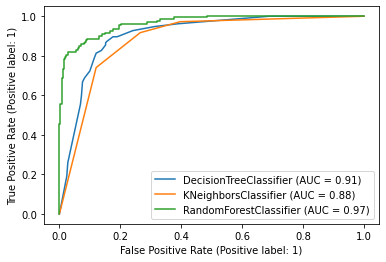

In [279]:
p1 = plot_roc_curve(dt_best_est, xtest, ytest)
for estimator in estimators[1:]:
    plot_roc_curve(estimator, xtest, ytest, ax = p1.ax_)


based on the above ROC curve the RandomForestClassifier is the best estimator and is hence selected

In [280]:
import joblib
joblib.dump( rf_best_est,'HR_analytics_estimator.pkl')

['HR_analytics_estimator.pkl']